In [1]:
import matplotlib.pyplot as plt
import numpy as np
energy = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
eff = [99,95,87,77,67,56,47,40,36,32,28,25,23,21,19,17]
eff_std = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
weight = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
p, residuals,_,_,_ = np.polyfit(energy, eff,deg = 5,w = weight,full = True)
x = np.linspace(50,800,1000)
def eff_poly(x):
    y = 2.46884179*10**-12*x**5 -6.33365087*10**-9*x**4 + 5.95052393*10**-6*x**3-2.32151604*10**-3*x**2+1.83387811*10**-1*x+94.7980769
    return y
residual = np.zeros(16)
for i in range(0,15):
    residual[i] = (eff[i]- eff_poly(energy[i]))/eff_std[i]



/var/folders/k7/41s9ty6114d2b98hsv_9pq0w0000gn/T/ipykernel_2411/4163781438.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Photopeak Efficiency %',Fontsize=18)
/var/folders/k7/41s9ty6114d2b98hsv_9pq0w0000gn/T/ipykernel_2411/4163781438.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Energy (keV)', Fontsize=18)
/var/folders/k7/41s9ty6114d2b98hsv_9pq0w0000gn/T/ipykernel_2411/4163781438.py:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Studentized \n Residuals', Fontsize=18, labelpad=0)


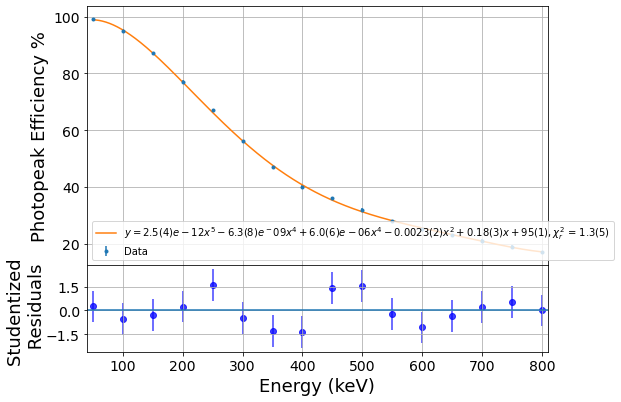

In [3]:
fig1 = plt.figure(1)
factor = 1
fig1.set_size_inches(factor*8, factor*6)
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.errorbar(energy,eff,yerr = eff_std,fmt='.',label = 'Data')
plt.plot(x,eff_poly(x),label = r"$y = 2.5(4)e-12x^{5}-6.3(8)e^-09x^{4}+6.0(6)e-06x^{4}-0.0023(2)x^{2}+0.18(3)x+95(1), \chi_{r}^{2}$ = 1.3(5)")
plt.ylabel('Photopeak Efficiency %',Fontsize=18)

plt.xlim(40, 810)
plt.legend(fontsize = 16,loc = 'lower left', prop={'size': 10})
plt.yticks(fontsize=14)
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.grid()

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2)) 
plt.errorbar(energy, residual, yerr=1, fmt='o', color='blue', alpha=0.75, zorder=0)
plt.xlabel('Energy (keV)', Fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Studentized \n Residuals', Fontsize=18, labelpad=0)
plt.xlim(40, 810)
plt.yticks([-3,-1.5,0,1.5,3])
plt.hlines(0,40,810)
plt.grid()
#plt.savefig('efficiency_fit.pdf')

plt.savefig('efficiency_fit.pdf', dpi=300, bbox_inches='tight')